In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/EURUSD_M1.csv')

In [7]:
df.head()


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2021.11.17,16:17:00,1.13006,1.13033,1.13006,1.13023,103,0,0
1,2021.11.17,16:18:00,1.13023,1.13029,1.13010,1.13028,53,0,0
2,2021.11.17,16:19:00,1.13028,1.13045,1.13027,1.13038,72,0,0
3,2021.11.17,16:20:00,1.13037,1.13045,1.13034,1.13039,100,0,0
4,2021.11.17,16:21:00,1.13039,1.13044,1.13032,1.13038,45,0,0


In [8]:
df.tail()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
99934,2022.02.23,08:01:00,1.13267,1.13280,1.13265,1.13275,20,0,4
99935,2022.02.23,08:02:00,1.13275,1.13275,1.13271,1.13272,12,0,4
99936,2022.02.23,08:03:00,1.13272,1.13272,1.13267,1.13268,10,0,6
99937,2022.02.23,08:04:00,1.13269,1.13270,1.13267,1.13268,13,0,0
99938,2022.02.23,08:05:00,1.13268,1.13275,1.13268,1.13275,15,0,3


In [9]:
df.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
count,99939.000000,99939.000000,99939.000000,99939.000000,99939.000000,99939.0,99939.000000
mean,1.131995,1.132069,1.131921,1.131995,47.979968,0.0,2.435856
std,0.006405,0.006407,0.006403,0.006405,43.693678,0.0,7.973473
min,1.112230,1.112420,1.112140,1.112250,1.000000,0.0,0.000000
25%,1.128590,1.128660,1.128520,1.128590,17.000000,0.0,0.000000
50%,1.131770,1.131830,1.131690,1.131770,36.000000,0.0,0.000000
75%,1.134910,1.135000,1.134830,1.134910,66.000000,0.0,1.000000
max,1.149430,1.149500,1.149250,1.149420,1606.000000,0.0,363.000000


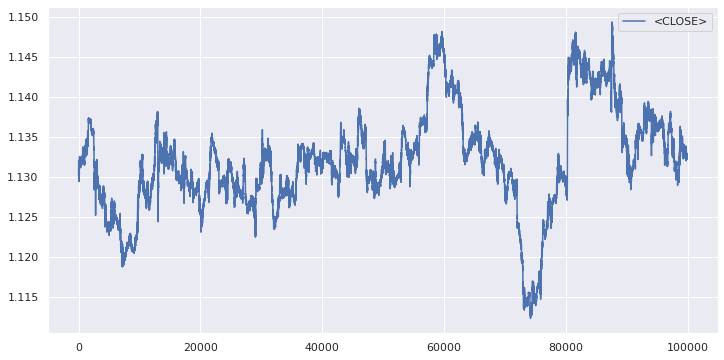

In [10]:
df[['<CLOSE>']].plot(figsize=(12,6));


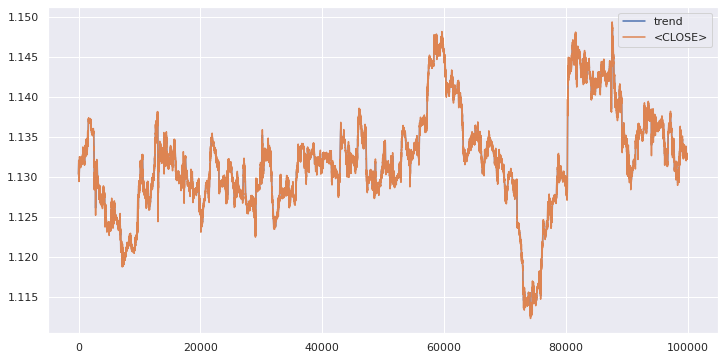

In [13]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['<CLOSE>'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','<CLOSE>']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-2.521394127954372,
 0.11035529570709862,
 0,
 498,
 {'1%': -3.4435494520411605,
  '5%': -2.8673612117611267,
  '10%': -2.5698704830567247},
 2395.0937219088914)

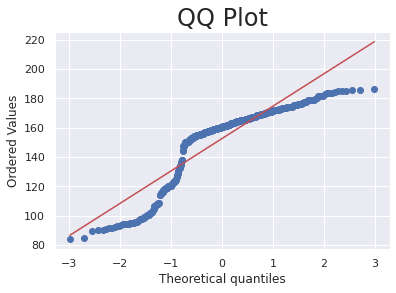

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [14]:
df['returns'] = df.<CLOSE>.pct_change(1)*100

SyntaxError: ignored

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


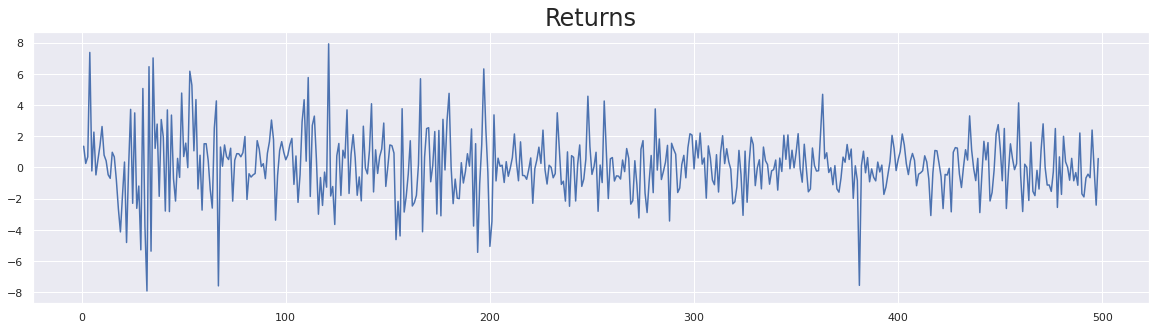

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


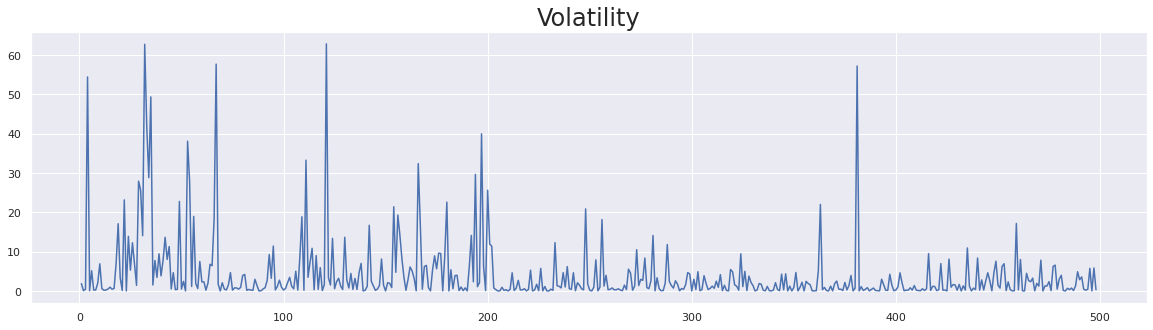

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

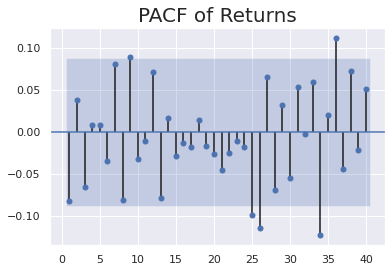

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

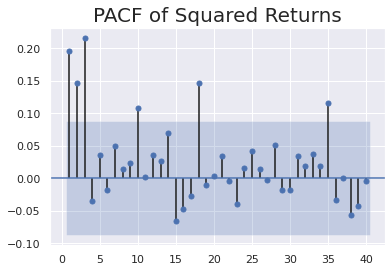

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.6 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH 

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1080.2248816119245
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1070.5058332657904
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1049.9795093986213
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1049.6122417497872
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1049.6122417497686
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1049.6122417497872
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1049.61
Distribution:                  Normal   AIC:                           2105.22
Method:            Maximum Likelihood   BIC:                           2117.86
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:05   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1388  8.626e-02      1.609      0.108 [-3.023e-02,  0.308]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.3429      0.375      8.911  5.058e-19   [  2.608,  4.078]
alpha[1]       0.1911  6.975e-02      2.740  6.152e-03 [5.437e-02,  0.328]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1045.5548881409688
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1045.5548874872984
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1045.55
Distribution:                  Normal   AIC:                           2099.11
Method:            Maximum Likelihood   BIC:                           2115.95
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1308  8.643e-02      1.514      0.130 [-3.856e-02,  0.300]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.0142      0.417      7.234  4.705e-13   [  2.197,  3.831]
alpha[1]       0.1309  6.439e-02      2.032  4.211e-02 [4.666e-03,  0.257]
alpha[2]       0.1331  6.610e-02      2.013  4.413e-02 [3.498e-03,  0.263]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1063.4957231957
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1032.3759815108801
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1032.3759815108801
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1032.38
Distribution:                  Normal   AIC:                           2074.75
Method:            Maximum Likelihood   BIC:                           2095.80
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1744  7.867e-02      2.217  2.662e-02 [2.022e-02,  0.329]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.3758      0.334      7.113  1.132e-12    [  1.721,  3.030]
alpha[1]       0.0648  6.014e-02      1.077      0.282 [-5.312e-02,  0.183]
alpha[2]       0.0474  4.082e-02      1.160      0.246 [-3.264e-02,  0.127]
alpha[3]       0.3255      0.128      2.544  1.095e-02  [7.476e-02,  0.576]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     86,   Neg. LLF: 1080.3162838159533
Iteration:     10,   Func. Count:    172,   Neg. LLF: 1040.357726030661
Iteration:     15,   Func. Count:    257,   Neg. LLF: 1026.0966278730289
Iteration:     20,   Func. Count:    342,   Neg. LLF: 1024.8247340407156
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1024.8247270579309
            Iterations: 22
            Function evaluations: 373
            Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1024.82
Distribution:                  Normal   AIC:                           2079.65
Method:            Maximum Likelihood   BIC:                           2142.81
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:24   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1631      0.128      1.273      0.203 [-8.795e-02,  0.414]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.6028      0.838      1.913  5.571e-02 [-3.913e-02,  3.245]
alpha[1]       0.0312      0.259      0.120      0.904    [ -0.477,  0.539]
alpha[2]       0.0486  6.131e-02      0.792      0.428 [-7.161e-02,  0.169]
alpha[3]       0.2638      0.143      1.849  6.452e-02 [-1.590e-02,  0.544]
alpha[4]       0.0000      0.315      0.000      1.000    [ -0.617,  0.617]
alpha[5]       0.0125      0.102      0.123      0.902    [ -0.187,  0.212]
alpha[6]   3.7995e-12      0.331  1.148e-11      1.000    [ -0.649,  0.649]
alpha[7]       0.0477      0.254      0.188      0.851    [ -0.450,  0.546]
alpha[8]   5.6904e-12      0.474  1.201e-11      1.000    [ -0.928,  0.928]
alpha[9]   3.3548e-13  9.299e-02  3.608e-12      1.000    [ -0.182,  0.182]
alpha[10]      0.0755      0.258      0.293      0.769    [ -0.429,  0.580]
alpha[11]  3.3081e-12      0.126  2.627e-11      1.000    [ -0.247,  0.247]
alpha[12]      0.0940      0.117      0.805      0.421    [ -0.135,  0.323]
alpha[13]      0.0414      0.189      0.218      0.827    [ -0.330,  0.413]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1032.7138126123862
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1032.711111606418
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1032.71
Distribution:                  Normal   AIC:                           2073.42
Method:            Maximum Likelihood   BIC:                           2090.26
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:33   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1083  8.784e-02      1.233      0.218 [-6.387e-02,  0.280]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1736      0.221      0.785      0.432    [ -0.260,  0.607]
alpha[1]       0.0709  5.599e-02      1.266      0.205 [-3.885e-02,  0.181]
beta[1]        0.8828      0.106      8.312  9.421e-17    [  0.675,  1.091]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1037.573356673877
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1038.357025009976
Iteration:     15,   Func. Count:    111,   Neg. LLF: 1029.404577141394
Iteration:     20,   Func. Count:    143,   Neg. LLF: 1029.3568783709052
Iteration:     25,   Func. Count:    173,   Neg. LLF: 1029.3525719875392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.3525442743692
            Iterations: 28
            Function evaluations: 193
            Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1029.35
Distribution:                  Normal   AIC:                           2068.71
Method:            Maximum Likelihood   BIC:                           2089.76
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:38   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0767  8.042e-02      0.954      0.340 [-8.087e-02,  0.234]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0116  1.353e-02      0.854      0.393 [-1.496e-02,3.808e-02]
alpha[1]   1.4717e-17  9.426e-03  1.561e-15      1.000 [-1.848e-02,1.848e-02]
beta[1]        0.0466      0.699  6.665e-02      0.947      [ -1.323,  1.416]
beta[2]        0.9443      0.709      1.332      0.183      [ -0.445,  2.334]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1079.2126306221737
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1056.8598294077951
Iteration:     15,   Func. Count:    121,   Neg. LLF: 1029.3563437459086
Iteration:     20,   Func. Count:    163,   Neg. LLF: 1030.277627314628
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.3525438617917
            Iterations: 25
            Function evaluations: 197
            Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1029.35
Distribution:                  Normal   AIC:                           2070.71
Method:            Maximum Likelihood   BIC:                           2095.97
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:44   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0767  8.088e-02      0.949      0.343 [-8.178e-02,  0.235]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0116  1.582e-02      0.730      0.465 [-1.945e-02,4.257e-02]
alpha[1]   4.4206e-11  1.393e-03  3.174e-08      1.000 [-2.730e-03,2.730e-03]
beta[1]        0.0463      0.971  4.764e-02      0.962      [ -1.857,  1.950]
beta[2]        0.9446      0.248      3.814  1.366e-04      [  0.459,  1.430]
beta[3]    1.4232e-13      1.066  1.335e-13      1.000      [ -2.090,  2.090]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1033.5131899573416
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1032.5852111964978
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1032.5852080933569
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1032.59
Distribution:                  Normal   AIC:                           2075.17
Method:            Maximum Likelihood   BIC:                           2096.22
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:50   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1129  8.986e-02      1.257      0.209 [-6.318e-02,  0.289]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1892      0.232      0.817      0.414 [ -0.265,  0.643]
alpha[1]       0.0463  8.055e-02      0.575      0.565 [ -0.112,  0.204]
alpha[2]       0.0323  8.843e-02      0.366      0.715 [ -0.141,  0.206]
beta[1]        0.8714      0.111      7.834  4.723e-15 [  0.653,  1.089]
========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1034.105689701786
Iteration:     10,   Func. Count:     87,   Neg. LLF: 1032.5320089668508
Iteration:     15,   Func. Count:    121,   Neg. LLF: 1032.530976947167
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1032.5309769471019
            Iterations: 15
            Function evaluations: 121
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1032.53
Distribution:                  Normal   AIC:                           2077.06
Method:            Maximum Likelihood   BIC:                           2102.33
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:23:57   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1183      0.118      1.002      0.316 [ -0.113,  0.350]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2393      0.755      0.317      0.751   [ -1.240,  1.719]
alpha[1]       0.0493      0.102      0.485      0.628   [ -0.150,  0.249]
alpha[2]       0.0192      0.119      0.161      0.872   [ -0.215,  0.253]
alpha[3]       0.0282      0.250      0.113      0.910   [ -0.462,  0.519]
beta[1]        0.8415      0.403      2.087  3.687e-02 [5.130e-02,  1.632]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 5871.673122896387
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1029.8147756678586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1029.8147756678586
            Iterations: 11
            Function evaluations: 83
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1029.81
Distribution:                  Normal   AIC:                           2069.63
Method:            Maximum Likelihood   BIC:                           2090.68
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:24:05   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0969  8.334e-02      1.163      0.245 [-6.640e-02,  0.260]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega           0.0460  6.423e-02      0.717      0.474   [-7.987e-02,  0.172]
alpha[1]        0.1376  9.659e-02      1.425      0.154   [-5.168e-02,  0.327]
gamma[1]   -6.2713e-03  4.265e-02     -0.147      0.883 [-8.987e-02,7.733e-02]
beta[1]         0.9680  4.407e-02     21.964 6.367e-107      [  0.882,  1.054]
==============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1029.34
Distribution:                  Normal   AIC:                           2068.67
Method:            Maximum Likelihood   BIC:                           2089.72
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:24:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0767  8.468e-02      0.906      0.365 [-8.926e-02,  0.243]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.9907e-03  1.925e-02      0.311      0.756 [-3.173e-02,4.371e-02]
alpha[1]   4.4189e-09  1.510e-02  2.926e-07      1.000 [-2.960e-02,2.960e-02]
gamma[1]   4.2658e-09  3.014e-02  1.416e-07      1.000 [-5.906e-02,5.906e-02]
beta[1]        0.9953  7.952e-03    125.170      0.000      [  0.980,  1.011]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1032.8727474071989
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1031.2892869803063
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1031.289194129013
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1031.29
Distribution:                  Normal   AIC:                           2072.58
Method:            Maximum Likelihood   BIC:                           2093.63
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:24:28   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0970  8.300e-02      1.169      0.242 [-6.565e-02,  0.260]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0834  6.006e-02      1.389      0.165 [-3.432e-02,  0.201]
alpha[1]       0.0758  2.443e-02      3.105  1.905e-03  [2.796e-02,  0.124]
gamma[1]       0.0183  4.386e-02      0.418      0.676 [-6.764e-02,  0.104]
beta[1]        0.8927  4.342e-02     20.558  6.476e-94    [  0.808,  0.978]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 6955.4298715483
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1030.6124184272194
Iteration:     15,   Func. Count:    106,   Neg. LLF: 1030.4228092630287
Iteration:     20,   Func. Count:    136,   Neg. LLF: 1030.3816075574111
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1030.3816075574111
            Iterations: 21
            Function evaluations: 141
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1030.38
Distribution:                  Normal   AIC:                           2070.76
Method:            Maximum Likelihood   BIC:                           2091.82
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:24:42   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1100  8.034e-02      1.370      0.171 [-4.742e-02,  0.267]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2412      0.404      0.597      0.551   [ -0.551,  1.033]
phi            0.0582      0.167      0.349      0.727   [ -0.269,  0.385]
d              0.2212  9.781e-02      2.261  2.375e-02 [2.946e-02,  0.413]
beta           0.2608      0.201      1.299      0.194   [ -0.133,  0.654]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1131.1772378476985
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1049.95129153809
Iteration:     15,   Func. Count:     75,   Neg. LLF: 1049.6122417406423
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1049.6122417406423
            Iterations: 16
            Function evaluations: 78
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1049.61
Distribution:                  Normal   AIC:                           2105.22
Method:            Maximum Likelihood   BIC:                           2117.86
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:24:55   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1388  8.626e-02      1.609      0.108 [-3.025e-02,  0.308]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.3429      0.375      8.911  5.058e-19   [  2.608,  4.078]
alpha[1]       0.1911  6.975e-02      2.740  6.152e-03 [5.438e-02,  0.328]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 260761797.9275843
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1286.9221895980181
Iteration:     15,   Func. Count:    123,   Neg. LLF: 1028.448813966256
Iteration:     20,   Func. Count:    163,   Neg. LLF: 1028.3882165657956
Iteration:     25,   Func. Count:    202,   Neg. LLF: 1028.3761395463544
Iteration:     30,   Func. Count:    242,   Neg. LLF: 1028.3666257166058
Iteration:     35,   Func. Count:    279,   Neg. LLF: 1148.142163747203
Iteration:     40,   Func. Count:    319,   Neg. LLF: 11395.896772784694
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1028.3430836746766
            Iterations: 40
            Function evaluations: 329
            Gradient evaluations: 40


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1028.34
Distribution:                  Normal   AIC:                           2068.69
Method:            Maximum Likelihood   BIC:                           2093.95
                                        No. Observations:                  498
Date:                Thu, Jan 26 2023   Df Residuals:                      497
Time:                        00:25:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0719  8.143e-04     88.305      0.000 [7.031e-02,7.350e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0290  2.456e-02      1.180      0.238 [-1.916e-02,7.710e-02]
alpha[1]       0.0530  2.236e-02      2.369  1.784e-02  [9.146e-03,9.679e-02]
gamma[1]       0.3255      0.236      1.377      0.168      [ -0.138,  0.789]
beta[1]        0.9293  3.290e-02     28.244 1.697e-175      [  0.865,  0.994]
delta          0.2322      0.155      1.496      0.135   [-7.203e-02,  0.536]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=143.36383796150415, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

143.36383796150415

In [ ]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1      1.362436
2      0.256311
3      0.682449
4      7.379135
5     -0.225017
         ...   
494   -0.657018
495    2.400213
496   -0.093733
497   -2.416965
498    0.573148
Name: returns, Length: 498, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=92.16694438135673, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

92.16694438135673

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

2.1339591371106743

coef. asimetria

In [ ]:
returns.skew()

0.08597143366325583

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -24.200
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -18.872
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.61 (1%), -1.99 (5%), -1.67 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -24.176
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.369
P-value                         0.087
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        499 non-null    object 
 1   Open        499 non-null    float64
 2   High        499 non-null    float64
 3   Low         499 non-null    float64
 4   Close       499 non-null    float64
 5   Adj Close   499 non-null    float64
 6   Volume      499 non-null    int64  
 7   trend       499 non-null    float64
 8   returns     498 non-null    float64
 9   sq_returns  498 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 39.1+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [28]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [29]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [16]:
data = df

In [17]:
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,trend
0,2021.11.17,16:17:00,1.13006,1.13033,1.13006,1.13023,103,0,0,1.130376
1,2021.11.17,16:18:00,1.13023,1.13029,1.13010,1.13028,53,0,0,1.130428
2,2021.11.17,16:19:00,1.13028,1.13045,1.13027,1.13038,72,0,0,1.130479
3,2021.11.17,16:20:00,1.13037,1.13045,1.13034,1.13039,100,0,0,1.130530
4,2021.11.17,16:21:00,1.13039,1.13044,1.13032,1.13038,45,0,0,1.130580
...,...,...,...,...,...,...,...,...,...,...
99934,2022.02.23,08:01:00,1.13267,1.13280,1.13265,1.13275,20,0,4,1.132637
99935,2022.02.23,08:02:00,1.13275,1.13275,1.13271,1.13272,12,0,4,1.132662
99936,2022.02.23,08:03:00,1.13272,1.13272,1.13267,1.13268,10,0,6,1.132686
99937,2022.02.23,08:04:00,1.13269,1.13270,1.13267,1.13268,13,0,0,1.132710


In [21]:
data = data[["<DATE>","<CLOSE>","<VOL>"]]


In [22]:
data

,<DATE>,<CLOSE>,<VOL>
0,2021.11.17,1.13023,0
1,2021.11.17,1.13028,0
2,2021.11.17,1.13038,0
3,2021.11.17,1.13039,0
4,2021.11.17,1.13038,0
...,...,...,...
99934,2022.02.23,1.13275,0
99935,2022.02.23,1.13272,0
99936,2022.02.23,1.13268,0
99937,2022.02.23,1.13268,0


In [31]:
data.columns = ["Date", "Close", "Volume"]

In [32]:
data

,Date,Close,Volume
0,2021.11.17,1.13023,0
1,2021.11.17,1.13028,0
2,2021.11.17,1.13038,0
3,2021.11.17,1.13039,0
4,2021.11.17,1.13038,0
...,...,...,...
99934,2022.02.23,1.13275,0
99935,2022.02.23,1.13272,0
99936,2022.02.23,1.13268,0
99937,2022.02.23,1.13268,0


In [33]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2021.11.17,1.13023,0,1.13028
1,2021.11.17,1.13028,0,1.13038
2,2021.11.17,1.13038,0,1.13039
3,2021.11.17,1.13039,0,1.13038
4,2021.11.17,1.13038,0,1.13058
...,...,...,...,...
99934,2022.02.23,1.13275,0,1.13272
99935,2022.02.23,1.13272,0,1.13268
99936,2022.02.23,1.13268,0,1.13268
99937,2022.02.23,1.13268,0,1.13275


In [34]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2021.11.17,1.13023,0,1.13028
1,2021.11.17,1.13028,0,1.13038
2,2021.11.17,1.13038,0,1.13039
3,2021.11.17,1.13039,0,1.13038
4,2021.11.17,1.13038,0,1.13058
...,...,...,...,...
99933,2022.02.23,1.13267,0,1.13275
99934,2022.02.23,1.13275,0,1.13272
99935,2022.02.23,1.13272,0,1.13268
99936,2022.02.23,1.13268,0,1.13268


In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [36]:
price_volume_target_scaled_df

array([[0.48372343, 0.        , 0.4850686 ],
       [0.4850686 , 0.        , 0.48775895],
       [0.48775895, 0.        , 0.48802798],
       ...,
       [0.55071294, 0.        , 0.5496368 ],
       [0.5496368 , 0.        , 0.5496368 ],
       [0.5496368 , 0.        , 0.55152004]])

In [37]:
price_volume_target_scaled_df.shape

(99938, 3)

In [38]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [39]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((99938, 2), (99938, 1))

In [40]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [41]:
X_train.shape, y_train.shape

((64959, 2), (64959, 1))

In [42]:
X_test.shape, y_test.shape

((34979, 2), (34979, 1))

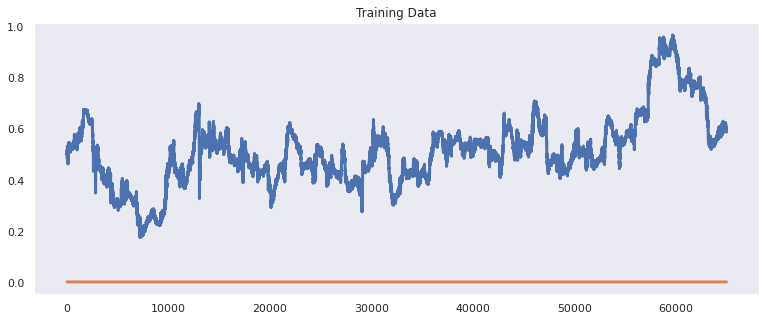

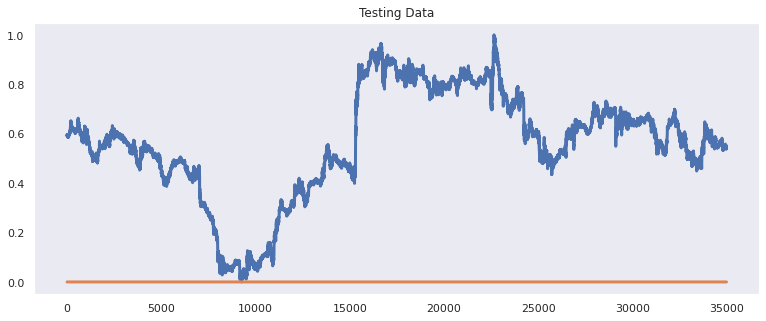

In [43]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [44]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [45]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9997103581140477


In [46]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.48375913],
       [0.48510283],
       [0.48779023],
       ...,
       [0.5506753 ],
       [0.54960034],
       [0.54960034]])

In [47]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [48]:
len(Predicted)

99938

In [49]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [50]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2021.11.17
1,2021.11.17
2,2021.11.17
3,2021.11.17
4,2021.11.17
...,...
99933,2022.02.23
99934,2022.02.23
99935,2022.02.23
99936,2022.02.23


In [51]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2021.11.17,0.483723
1,2021.11.17,0.485069
2,2021.11.17,0.487759
3,2021.11.17,0.488028
4,2021.11.17,0.487759
...,...,...
99933,2022.02.23,0.549368
99934,2022.02.23,0.551520
99935,2022.02.23,0.550713
99936,2022.02.23,0.549637


In [52]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2021.11.17,0.483723,0.483759
1,2021.11.17,0.485069,0.485103
2,2021.11.17,0.487759,0.487790
3,2021.11.17,0.488028,0.488059
4,2021.11.17,0.487759,0.487790
...,...,...,...
99933,2022.02.23,0.549368,0.549332
99934,2022.02.23,0.551520,0.551482
99935,2022.02.23,0.550713,0.550675
99936,2022.02.23,0.549637,0.549600


In [53]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [54]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Output hidden; open in https://colab.research.google.com to view.

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-27,91.417000,70570000,92.662498
1,2020-01-28,92.662498,56160000,92.900002
2,2020-01-29,92.900002,41760000,93.533997
3,2020-01-30,93.533997,126548000,100.435997
4,2020-01-31,100.435997,311346000,100.209999
...,...,...,...,...
494,2022-01-10,161.485992,87798000,165.362000
495,2022-01-11,165.362000,62806000,165.207001
496,2022-01-12,165.207001,50030000,161.214005
497,2022-01-13,161.214005,52188000,162.138000


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,91.417000,70570000,92.662498
1,2020-01-28,92.662498,56160000,92.900002
2,2020-01-29,92.900002,41760000,93.533997
3,2020-01-30,93.533997,126548000,100.435997
4,2020-01-31,100.435997,311346000,100.209999
...,...,...,...,...
494,2022-01-10,161.485992,87798000,165.362000
495,2022-01-11,165.362000,62806000,165.207001
496,2022-01-12,165.207001,50030000,161.214005
497,2022-01-13,161.214005,52188000,162.138000


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[9.14170000e+01, 7.05700000e+07],
       [9.26624980e+01, 5.61600000e+07],
       [9.29000020e+01, 4.17600000e+07],
       [9.35339970e+01, 1.26548000e+08],
       [1.00435997e+02, 3.11346000e+08],
       [1.00209999e+02, 1.17834000e+08],
       [1.02483498e+02, 1.05786000e+08],
       [1.01993500e+02, 8.75240000e+07],
       [1.02511497e+02, 6.36600000e+07],
       [1.03963997e+02, 1.01906000e+08],
       [1.06695503e+02, 1.01124000e+08],
       [1.07540001e+02, 1.14920000e+08],
       [1.08000000e+02, 6.66860000e+07],
       [1.07493500e+02, 6.06360000e+07],
       [1.06743500e+02, 5.21240000e+07],
       [1.07783501e+02, 5.89120000e+07],
       [1.08511002e+02, 5.12240000e+07],
       [1.07654999e+02, 6.26260000e+07],
       [1.04798500e+02, 9.29260000e+07],
       [1.00464500e+02, 1.30940000e+08],
       [9.86370010e+01, 1.24382000e+08],
       [9.89795000e+01, 1.04492000e+08],
       [9.42149960e+01, 1.62880000e+08],
       [9.41875000e+01, 1.89620000e+08],
       [9.769750

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.07384176]),
 array([0.08596457]),
 array([0.08827627]),
 array([0.09444714]),
 array([0.16162643]),
 array([0.15942672]),
 array([0.18155539]),
 array([0.17678608]),
 array([0.18182791]),
 array([0.19596554]),
 array([0.22255213]),
 array([0.23077188]),
 array([0.2352492]),
 array([0.23031928]),
 array([0.2230193]),
 array([0.23314195]),
 array([0.24022294]),
 array([0.2318912]),
 array([0.20408801]),
 array([0.16190386]),
 array([0.14411625]),
 array([0.1474499]),
 array([0.10107551]),
 array([0.10080789]),
 array([0.13497181]),
 array([0.11309133]),
 array([0.14562]),
 array([0.12041077]),
 array([0.10924663]),
 array([0.06034655]),
 array([0.1047353]),
 array([0.07020149]),
 array([0.]),
 array([0.05274968]),
 array([0.00610277]),
 array([0.0638651]),
 array([0.07464962]),
 array([0.0994355]),
 array([0.08248004]),
 array([0.11009348]),
 array([0.12823145]),
 array([0.10182502]),
 array([0.13572124]),
 array([0.10876484]),
 array([0.13983847]),
 array([0.1329132]),
 array(

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((348, 1, 1), (150, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
9/9 [==============================] - 10s 223ms/step - loss: 0.3346 - val_loss: 0.4608
Epoch 2/20
9/9 [==============================] - 0s 28ms/step - loss: 0.2268 - val_loss: 0.2266
Epoch 3/20
9/9 [==============================] - 0s 31ms/step - loss: 0.0650 - val_loss: 0.0012
Epoch 4/20
9/9 [==============================] - 0s 36ms/step - loss: 0.0445 - val_loss: 0.0020
Epoch 5/20
9/9 [==============================] - 0s 29ms/step - loss: 0.0277 - val_loss: 0.0363
Epoch 6/20
9/9 [==============================] - 0s 33ms/step - loss: 0.0240 - val_loss: 0.0073
Epoch 7/20
9/9 [==============================] - 0s 32ms/step - loss: 0.0190 - val_loss: 0.0020
Epoch 8/20
9/9 [==============================] - 0s 36ms/step - loss: 0.0170 - val_loss: 0.0096
Epoch 9/20
9/9 [==============================] - 0s 31ms/step - loss: 0.0127 - val_loss: 0.0021
Epoch 10/20
9/9 [==============================] - 0s 33ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 11/20
9/9 [==========

In [ ]:
# Make prediction
predicted = model.predict(X)

16/16 [==============================] - 2s 6ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
494,2022-01-10
495,2022-01-11
496,2022-01-12
497,2022-01-13


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-28,0.105717
2,2020-01-29,0.115357
3,2020-01-30,0.117202
4,2020-01-31,0.122138
5,2020-02-03,0.176878
...,...,...
494,2022-01-10,0.755552
495,2022-01-11,0.744274
496,2022-01-12,0.785426
497,2022-01-13,0.783768


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.105717,0.085965
2,2020-01-29,0.115357,0.088276
3,2020-01-30,0.117202,0.094447
4,2020-01-31,0.122138,0.161626
5,2020-02-03,0.176878,0.159427
...,...,...,...
494,2022-01-10,0.755552,0.755845
495,2022-01-11,0.744274,0.793571
496,2022-01-12,0.785426,0.792063
497,2022-01-13,0.783768,0.753197


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")